# バブルソート

- バブルソート
- シェーカーソート（バブルソート改良版）

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random

In [2]:
# バブルソート
def bubble_sort(array):
    N = len(array)
    for i in range(N-1):
        for j in range(N-1-i):
            if array[j] > array[j+1]:
                buff = array[j]
                array[j] = array[j+1]
                array[j+1] = buff

In [3]:
arr = np.array([random.randint(0, 100) for i in range(30)])
bubble_sort(arr)
arr

array([ 1,  3,  5, 13, 13, 17, 21, 26, 31, 32, 33, 37, 37, 40, 43, 47, 51,
       56, 58, 58, 63, 69, 73, 74, 82, 85, 90, 93, 96, 98])

In [8]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    bubble_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.553014
1,2000.0,2.399989
2,3000.0,4.497548
3,4000.0,7.892542
4,5000.0,12.508864
5,6000.0,18.334557
6,7000.0,25.013987
7,8000.0,31.776425
8,9000.0,40.534148
9,10000.0,51.020262


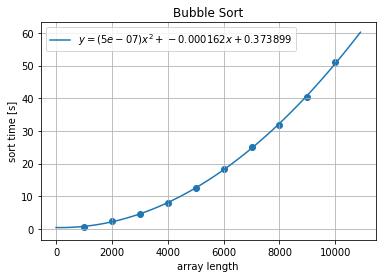

,a
0,5.187147e-07
1,-1.620514e-04
2,3.738990e-01


In [12]:
from scipy.optimize import curve_fit
def func_fit(x, a, b, c):
    return (a * x + b) * x + c

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1], param[2])

plt.title('Bubble Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x^2 + {}x + {}$'.format(round(param[0], 7), round(param[1], 6), round(param[2], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])

In [13]:
# シェーカーソート
def shaker_sort(array):
    N = len(array)
    i_left = 0
    i_right = N-1
    
    while True:
        cnt_switch = 0
        i = i_left
        i_last_switch = i_left
        while i < i_right:
            if array[i] > array[i+1]:
                buff = array[i]
                array[i] = array[i+1]
                array[i+1] = buff
                i_last_switch = i
                cnt_switch += 1
            i += 1
        i_right = i_last_switch
        if cnt_switch == 0:
            break
    
        cnt_switch = 0
        i = i_right
        i_last_switch = i_right
        while i_left < i:
            if array[i-1] > array[i]:
                buff = array[i]
                array[i] = array[i-1]
                array[i-1] = buff
                i_last_switch = i
                cnt_switch += 1
            i -= 1
        i_left = i_last_switch
        if cnt_switch == 0:
            break

In [14]:
arr = np.array([random.randint(0, 100) for i in range(30)])
shaker_sort(arr)
arr

array([  3,  10,  12,  18,  18,  23,  23,  25,  28,  30,  33,  34,  34,
        37,  38,  50,  55,  58,  73,  74,  80,  84,  86,  87,  88,  92,
        95,  95,  97, 100])

In [15]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    shaker_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.515147
1,2000.0,2.188433
2,3000.0,4.545582
3,4000.0,7.831537
4,5000.0,11.729605
5,6000.0,16.721578
6,7000.0,24.433469
7,8000.0,30.574318
8,9000.0,37.172448
9,10000.0,44.666334


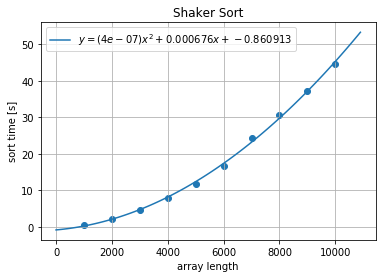

,a
0,3.942841e-07
1,6.761494e-04
2,-8.609134e-01


In [16]:
from scipy.optimize import curve_fit
def func_fit(x, a, b, c):
    return (a * x + b) * x + c

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1], param[2])

plt.title('Shaker Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x^2 + {}x + {}$'.format(round(param[0], 7), round(param[1], 6), round(param[2], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])